
# **INTRUSION DETECTION USING MACHINE LEARNING -IA2**
**BY**

1814061 Tirth Thaker

1814062 Gopalkrishna Waja

1814063 Dhairya Umrania


Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

Loading the Dataset

In [2]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path)
df

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


# DATASET PREPROCESSING

In [ ]:
cols="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,
root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,
serror_rate,srv_serror_rate, rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,
dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')


Mapping the different Attacks to the primary 5 categories:-

*   Normal
*   DOS
*   Probe
*   U2R
*   R2L

In [ ]:
attacks_types = {'normal': 'normal','back': 'dos','buffer_overflow': 'u2r','ftp_write': 'r2l','guess_passwd': 'r2l','imap': 'r2l','ipsweep': 'probe',
'land': 'dos','loadmodule': 'u2r','multihop': 'r2l','neptune': 'dos','nmap': 'probe','perl': 'u2r','phf': 'r2l','pod': 'dos','portsweep': 'probe','rootkit': 'u2r',
'satan': 'probe','smurf': 'dos','spy': 'r2l','teardrop': 'dos','warezclient': 'r2l','warezmaster': 'r2l',}


In [ ]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#Finding non-numeric features features
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')
cate_cols

['service', 'flag', 'protocol_type']

CATEGORICAL FEATURES DISTRIBUTION

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

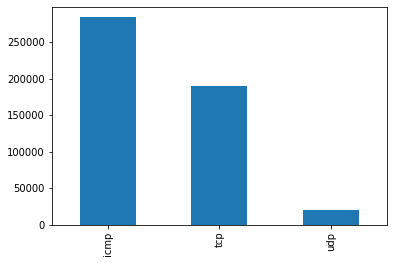

In [ ]:
bar_graph('protocol_type')

Protocol type: We see that most of the data items are following ICMP protocol

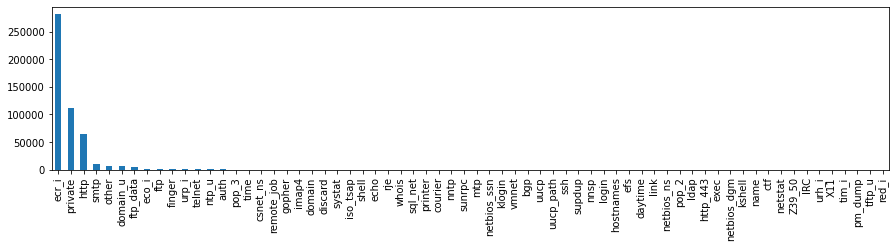

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

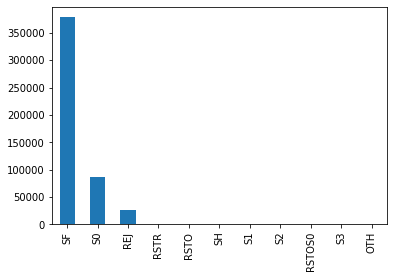

In [ ]:
bar_graph('flag')

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)
attack_type={'normal':0,'dos':1,'probe':2,'r2l':3,'u2r':4}
df['Attack Type'] = df['Attack Type'].map(attack_type)

Dimentionality reduction

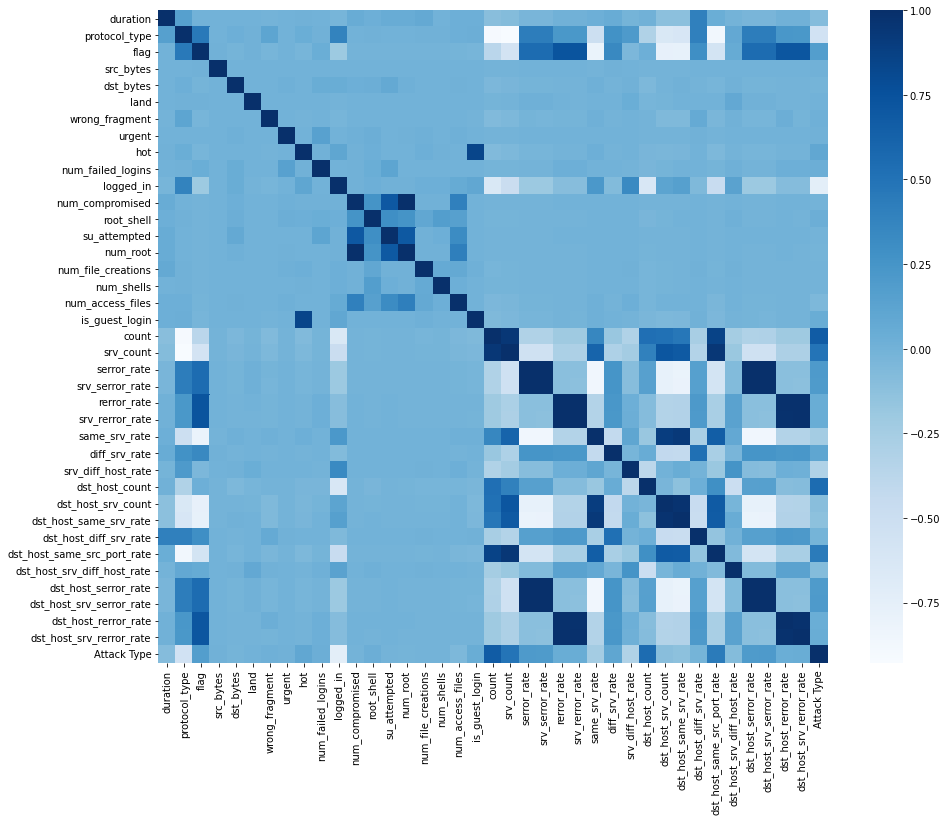

In [ ]:
df = df.dropna('columns')# drop columns with NaN
# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,cmap="Blues")
plt.show()

In [ ]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [ ]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [ ]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [ ]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [ ]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [ ]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [ ]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [ ]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [ ]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [ ]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

df.drop('service',axis = 1,inplace= True)

In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,0
1,0,1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0
2,0,1,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0
3,0,1,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0
4,0,1,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0


In [ ]:
df.shape

(494021, 32)

### Train-Test Split

In [ ]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


Model Preparation

GAUSSIAN NAIVE BAYES

In [ ]:
model1 = GaussianNB()
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)
t1=end_time-start_time
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
_,_,f1,_=precision_recall_fscore_support(Y_test, Y_test_pred1, average='macro')
print("Testing time: ",end_time-start_time)
print(classification_report(Y_test, Y_test_pred1))
print("Average F1 Score ",f1)

Training time:  0.24349522590637207
Testing time:  0.13194513320922852
              precision    recall  f1-score   support

           0       0.97      0.64      0.77     19353
           1       0.98      0.94      0.96     78355
           2       0.09      0.99      0.17       850
           3       0.32      0.38      0.35       235
           4       0.01      0.83      0.01        12

    accuracy                           0.88     98805
   macro avg       0.47      0.76      0.45     98805
weighted avg       0.97      0.88      0.91     98805

Average F1 Score  0.45351953600799677


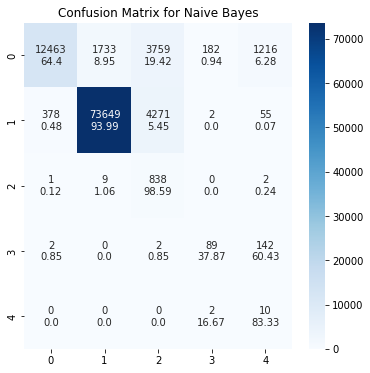

In [ ]:
cf_matrix = confusion_matrix(Y_test, Y_test_pred1)
#group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=[]
for i in range(0,5):
  a=(cf_matrix[i] / np.sum(cf_matrix[i]))*100
  #avg=["{0:.2%}".format(value) for value in a]
  for val in a:
    val=round(val,2)
    group_percentages.append(val)
 
labels = [
        f"{v2}\n{v3}"
        for  v2, v3 in zip(group_counts, group_percentages)
    ]
labels = np.asarray(labels).reshape(5, 5)
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix for Naive Bayes")
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

DECISION TREE

In [ ]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)
t2=end_time-start_time
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
_,_,f2,_=precision_recall_fscore_support(Y_test, Y_test_pred2, average='macro')

print(classification_report(Y_test, Y_test_pred2 ))
print("Average F1 Score ",f2)

Training time:  1.2303788661956787
Testing time:  0.01744532585144043
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19353
           1       1.00      1.00      1.00     78355
           2       0.56      0.88      0.69       850
           3       0.00      0.00      0.00       235
           4       0.00      0.00      0.00        12

    accuracy                           0.99     98805
   macro avg       0.51      0.57      0.53     98805
weighted avg       0.99      0.99      0.99     98805

Average F1 Score  0.5332007021944766


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


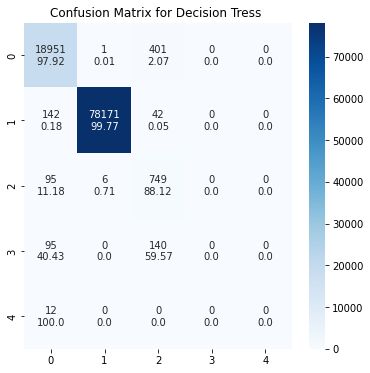

In [ ]:
cf_matrix = confusion_matrix(Y_test, Y_test_pred2)
#group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=[]
for i in range(0,5):
  a=(cf_matrix[i] / np.sum(cf_matrix[i]))*100
  #avg=["{0:.2%}".format(value) for value in a]
  for val in a:
    val=round(val,2)
    group_percentages.append(val)
 
labels = [
        f"{v2}\n{v3}"
        for  v2, v3 in zip(group_counts, group_percentages)
    ]
labels = np.asarray(labels).reshape(5, 5)
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix for Decision Tress ")
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

RANDOM FOREST

In [ ]:
model3 = RandomForestClassifier(n_estimators=30)
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)
t3=end_time-start_time
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)
_,_,f3,_=precision_recall_fscore_support(Y_test, Y_test_pred3, average='macro')
print(classification_report(Y_test, Y_test_pred3 ))
print("Average F1 Score ",f3)

Training time:  12.122725248336792
Testing time:  0.31253838539123535
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19353
           1       1.00      1.00      1.00     78355
           2       1.00      0.98      0.99       850
           3       0.98      0.94      0.96       235
           4       0.90      0.75      0.82        12

    accuracy                           1.00     98805
   macro avg       0.98      0.94      0.95     98805
weighted avg       1.00      1.00      1.00     98805

Average F1 Score  0.9543046608282779


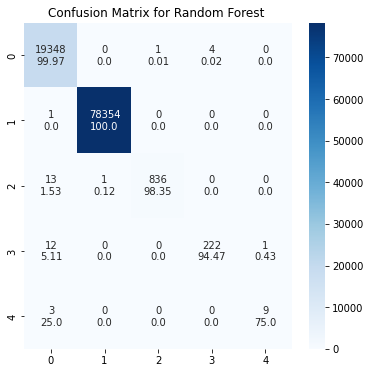

In [ ]:
cf_matrix = confusion_matrix(Y_test, Y_test_pred3)
#group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=[]
for i in range(0,5):
  a=(cf_matrix[i] / np.sum(cf_matrix[i]))*100
  #avg=["{0:.2%}".format(value) for value in a]
  for val in a:
    val=round(val,2)
    group_percentages.append(val)
 
labels = [
        f"{v2}\n{v3}"
        for  v2, v3 in zip(group_counts, group_percentages)
    ]
labels = np.asarray(labels).reshape(5, 5)
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix for Random Forest ")
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

SMOTE + Naive Bayes, SMOTE + Decision Tree, SMOTE + Random Forest

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score

sampling=SMOTE(random_state=777)

x_s,y_s= sampling.fit_resample(X,Y.values.ravel())
X_train, X_test, Y_train, Y_test = train_test_split(x_s, y_s, test_size=0.2, random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
start_time = time.time()
model1.fit(X_train, Y_train)
end_time = time.time()
t4=end_time-start_time
y_predsn = model1.predict(X_test)

start_time = time.time()
model2.fit(X_train, Y_train)
end_time = time.time()
t5=end_time-start_time

y_predsd = model2.predict(X_test)

start_time = time.time()
model3.fit(X_train, Y_train)
end_time = time.time()
t6=end_time-start_time

y_predsf = model3.predict(X_test)

_,_,f4,_=precision_recall_fscore_support(Y_test, y_predsn, average='macro')
print("Testing time: ",t4)
print("SMOTE + Gausian Naive Bayes")
print(classification_report(Y_test, y_predsn,digits=4 ))
print("Average F1 Score ",f4)

print("Testing time: ",t5)
print("SMOTE + Decision Trees")
_,_,f5,_=precision_recall_fscore_support(Y_test, y_predsd, average='macro')
print(classification_report(Y_test, y_predsd,digits=4 ))
print("Average F1 Score ",f5)

print("Testing time: ",t6)
print("SMOTE + Random Forest")
_,_,f6,_=precision_recall_fscore_support(Y_test, y_predsf, average='macro')
print(classification_report(Y_test, y_predsf,digits=4))
print("Average F1 Score ",f6)

SMOTE + Gausian Naive Bayes
              precision    recall  f1-score   support

           0     0.9832    0.6654    0.7936     78509
           1     0.9103    0.9393    0.9246     78081
           2     0.7672    0.9929    0.8656     77851
           3     0.9702    0.4069    0.5734     78764
           4     0.5991    0.9491    0.7346     78253

    accuracy                         0.7899    391458
   macro avg     0.8460    0.7907    0.7783    391458
weighted avg     0.8463    0.7899    0.7779    391458

Average F1 Score  0.7783410817903708
SMOTE + Decision Trees
              precision    recall  f1-score   support

           0     0.9267    0.8145    0.8670     78509
           1     1.0000    0.9881    0.9940     78081
           2     0.9097    0.9496    0.9292     77851
           3     0.9492    0.9858    0.9672     78764
           4     0.9286    0.9758    0.9516     78253

    accuracy                         0.9427    391458
   macro avg     0.9428    0.9428    0.9418

F1 Socres

<BarContainer object of 6 artists>

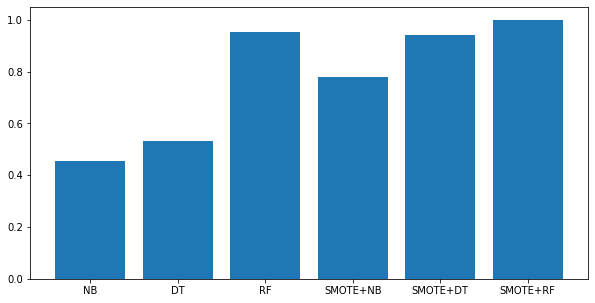

In [ ]:
names = ['NB','DT','RF','SMOTE+NB','SMOTE+DT','SMOTE+RF']  
values = [f1,f2,f3,f4,f5,f6]
f = plt.figure(figsize=(10,5))
plt.bar(names,values)

In [ ]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

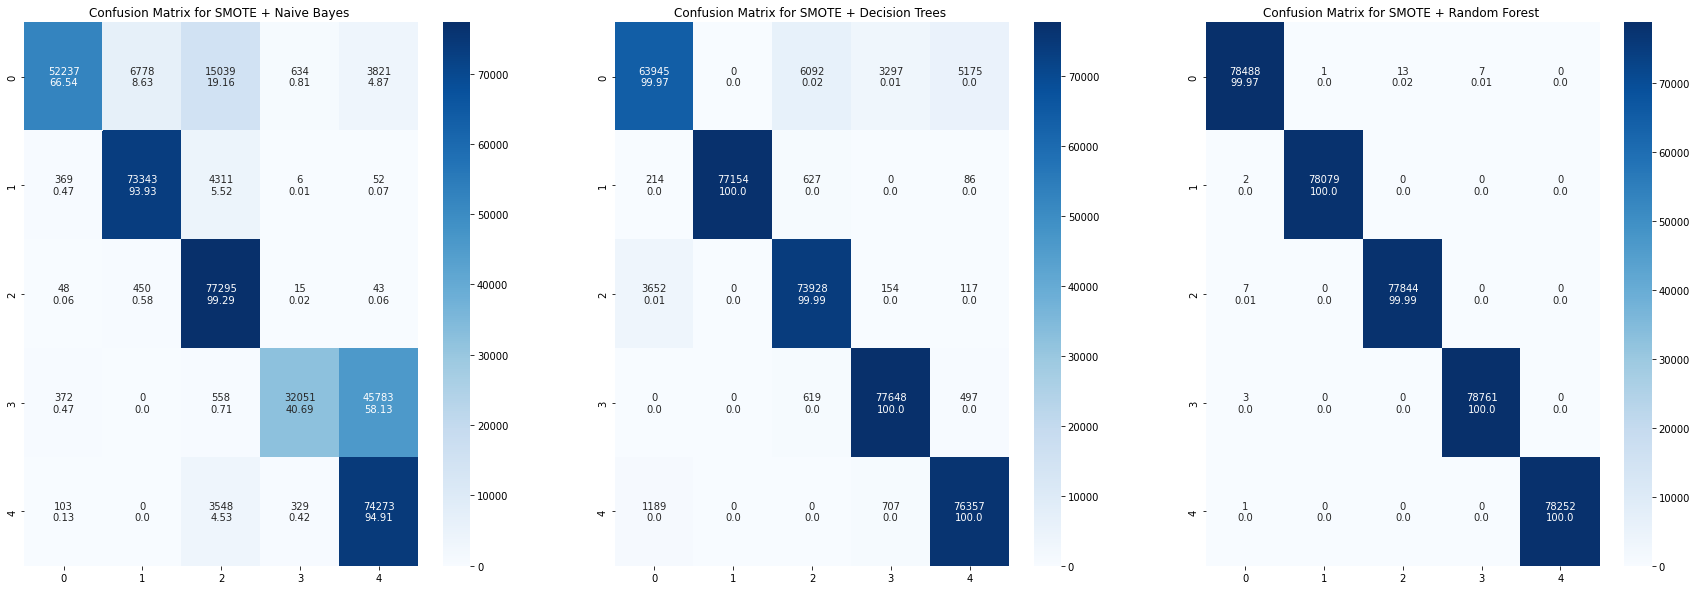

In [ ]:
cf_matrix1 = confusion_matrix(Y_test, y_predsn)
cf_matrix2 = confusion_matrix(Y_test, y_predsd)
cf_matrix3 = confusion_matrix(Y_test, y_predsf)
#group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts1 = ["{0:0.0f}".format(value) for value in cf_matrix1.flatten()]
group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_counts3 = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages1=[]
group_percentages2=[]
group_percentages3=[]
for i in range(0,5):
  a=(cf_matrix1[i] / np.sum(cf_matrix1[i]))*100
  #avg=["{0:.2%}".format(value) for value in a]
  for val in a:
    val=round(val,2)
    group_percentages1.append(val)
  
  a=(cf_matrix2[i] / np.sum(cf_matrix2[i]))*100
  #avg=["{0:.2%}".format(value) for value in a]
  for val in a:
    val=round(val,2)
    group_percentages2.append(val)
  
  a=(cf_matrix3[i] / np.sum(cf_matrix3[i]))*100
  #avg=["{0:.2%}".format(value) for value in a]
  for val in a:
    val=round(val,2)
    group_percentages3.append(val)
  
labels1 = [
        f"{v2}\n{v3}"
        for  v2, v3 in zip(group_counts1, group_percentages1)
    ]
labels2 = [
        f"{v2}\n{v3}"
        for  v2, v3 in zip(group_counts2, group_percentages3)
    ]
labels3 = [
        f"{v2}\n{v3}"
        for  v2, v3 in zip(group_counts3, group_percentages3)
    ]
labels1,labels2,labels3 = np.asarray(labels1).reshape(5, 5),np.asarray(labels2).reshape(5, 5),np.asarray(labels3).reshape(5, 5)

plt.figure(figsize=(30,10))
plt.subplot(131)
sns.heatmap(cf_matrix1, annot=labels1, fmt="",cmap="Blues")
plt.title("Confusion Matrix for SMOTE + Naive Bayes ")
plt.subplot(132)
sns.heatmap(cf_matrix2, annot=labels2, fmt="",cmap="Blues")
plt.title("Confusion Matrix for SMOTE + Decision Trees ")
plt.subplot(133)
sns.heatmap(cf_matrix3, annot=labels3, fmt="",cmap="Blues")
plt.title("Confusion Matrix for SMOTE + Random Forest ")
plt.show()

TRAINING TIME

<BarContainer object of 6 artists>

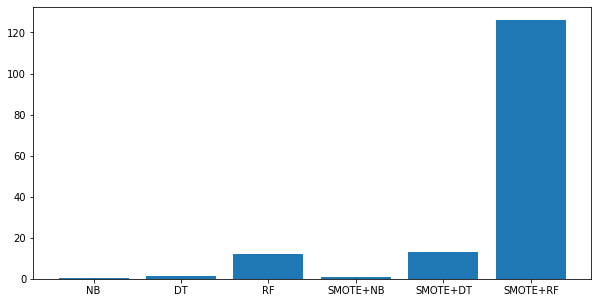

In [ ]:
names = ['NB','DT','RF','SMOTE+NB','SMOTE+DT','SMOTE+RF']  
values = [t1,t2,t3,t4,t5,t6]
f = plt.figure(figsize=(10,5))

plt.bar(names,values)

In [ ]:
print("Testing time for S+NB: ",t4)
print("Testing time for S+DT  ",t5)
print("Testing time for S+RF ",t6)

Testing time for S+NB:  0.9686698913574219
Testing time for S+DT   9.664809226989746
Testing time for S+RF  104.8794367313385
